# Melting Curve Analysis for Cary 3500
Cary 3500 'report'

In [1]:
#Import everything from main
from main import  *

## Import data and add meta data
This program uses 'report-csv'-data files. Place them in the "data_raw" directory. Every file in this folder will be loaded.

In [2]:
#Optinal input of metadata, which should be applied to one data-file  ->  {'file_name': {'meta_name_1': meta_value}}
EXTRA_META = {'2023_08_09_DNA_MOPS_75_K.csv': {'Sample': 'DNA','Buffer': 'MOPS', 'pH': 6.5, 'bg in mM': 2.29, '[Buffer] in mM': 10}, '2023-11-17_RNA_melting_MgCl2_NaCl.csv': {'Sample': 'RNA', 'Monovalent Ion': 'Na(I)'}}# optinal: spezifisch fuer eine Messung kann hier jeweils Metadaten hinzugefuegt werden

#Create class object --> nicht optional
data_obj = MeltingCurveAnalysis(EXTRA_META)
#Load all files from 'data_raw' folder --> nicht optional
data_obj.fill_data_dict()


#Generation of meta data, from the given sample name and add them to meta, all file names in '[]' 
data_obj.meta_from_name_Paul(['2023_08_09_DNA_MOPS_75_K.csv', '2023-11-17_RNA_melting_MgCl2_NaCl.csv'])# Funktion heisst .meta_from_name_Paul --> wieder fuer alle Messungen einzeln aufschreiben
#Ceate an overview of all curves, this function takes metadata from all curves and puts them in one dataframe
data_obj._create_meta_overview()
data_obj.meta_overview # gi ist einfach nur ein index der durchzaehlt

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,Sample,Monovalent Ion,gi,file_name,Concentration,Concentration Unit,Ion,Buffer,pH,bg in mM,[Buffer] in mM
0,1,10_mM_MgCl2,260.0,90.0,21.0,1,Cooling,RNA,Na(I),1,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM,MgCl2,NaN,NaN,NaN,NaN
1,2,10 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,Na(I),2,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM,MgCl2,NaN,NaN,NaN,NaN
2,3,10 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,Na(I),3,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM,MgCl2,NaN,NaN,NaN,NaN
3,4,10 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,Na(I),4,2023-11-17_RNA_melting_MgCl2_NaCl.csv,10.0,mM,MgCl2,NaN,NaN,NaN,NaN
4,5,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,Na(I),5,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM,MgCl2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,44,0_mM_K(I)_MOPS_pH7.5,400.0,20.0,80.0,1,Heating,DNA,NaN,76,2023_08_09_DNA_MOPS_75_K.csv,0.0,mM,K(I),MOPS,6.5,2.29,10.0
76,45,0_mM_K(I)_MOPS_pH7.5,400.0,80.0,20.0,2,Cooling,DNA,NaN,77,2023_08_09_DNA_MOPS_75_K.csv,0.0,mM,K(I),MOPS,6.5,2.29,10.0
77,46,0_mM_K(I)_MOPS_pH7.5,400.0,20.0,80.0,2,Heating,DNA,NaN,78,2023_08_09_DNA_MOPS_75_K.csv,0.0,mM,K(I),MOPS,6.5,2.29,10.0
78,47,0_mM_K(I)_MOPS_pH7.5,400.0,80.0,20.0,3,Cooling,DNA,NaN,79,2023_08_09_DNA_MOPS_75_K.csv,0.0,mM,K(I),MOPS,6.5,2.29,10.0


### To save your analysis progress, you can use the 'save' and 'load' function. Your 'data'-dictionary gets saved by the 'pickle'-modula as binary data. If you load your data, you have to create a new 'meta_overview'. It is advisible to rename your filename with each new save (add numbers) to prevent file corruption.

In [3]:
#index
idx = 1 #Increase index after each save manually -> bei jedem neuen ausfuehren
#Save
file_name = f'example_{idx}'
data_obj.save(filename = file_name) 

file_name = f'example_{idx+1}'

#Load
pickled_data = MeltingCurveAnalysis.load(filename = file_name)#laedt angegebene datei (filename = 'xyz') in die variable pickled_data

#Add additional meta data.
'''
EXTRA_META = {'2023_08_09_DNA_MOPS_75_K.csv': {'New': 'value'}}
for key, value in pickled_data.items():
    for k2, v2 in value.items():
        temp = EXTRA_META.get(key)
        v2['meta'].update(temp)
'''

#Create class object
data_obj = MeltingCurveAnalysis()
#write pickled data to object
data_obj.data = pickled_data
#Create new 'meta_overview'
data_obj._create_meta_overview()

## Plot some curves
If you want to plot some raw data, generatet by the Cary 3500. You have to acces the 'data'-dataframe of each curve.

Text(0.5, 0, 'Temperature in °C')

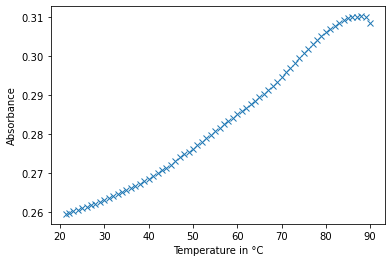

In [4]:
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index --> column 'Measurement' in data_obj.meta_overview
mi = 1

example_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
#print(example_curve) # hier stehen die Messwerte drin --> kann man auch auskommentieren

#Plot
fig,ax=plt.subplots(1,1)
ax.plot(example_curve['Temperature (°C)'], example_curve['Absorbance'], 'x')
ax.set_ylabel('Absorbance')
ax.set_xlabel('Temperature in °C')

You may also want to plot multiple curves or get some specific data. You may filter 'meta_overview' and extract from that dataframe the file name and the measurement index.
An 'easy' way to do so is using the 'apply_filters'-function. You can now group the remaining values and do with them whatever you want. For example plot them. If you want to align your legend values on the right, you can use the following function.

In [5]:
# legende in plots rechts aligned
def legend_text_right_align(legend, width):
    hp = legend._legend_box.get_children()[1]
    for vp in hp.get_children():
        for row in vp.get_children():
            row.set_width(width)  # need to adapt this manually
            row.mode = "expand"
            row.align = "right"

In [6]:
# hier kann ganz einfach nach jeder beliebigen spalte in allen Messungen auf einmal ge´filtert werden, je nach meinen angegebenen filter-parametern
filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-11-17_RNA_melting_MgCl2_NaCl.csv'],
                                        'Wavelength (nm)': [260], 'Concentration': [1, 5]})
filtered_meta_df

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,Sample,Monovalent Ion,gi,file_name,Concentration,Concentration Unit,Ion,Buffer,pH,bg in mM,[Buffer] in mM
4,5,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,Na(I),5,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM,MgCl2,NaN,NaN,NaN,NaN
5,6,5 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,Na(I),6,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM,MgCl2,NaN,NaN,NaN,NaN
6,7,5 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,Na(I),7,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM,MgCl2,NaN,NaN,NaN,NaN
7,8,5 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,Na(I),8,2023-11-17_RNA_melting_MgCl2_NaCl.csv,5.0,mM,MgCl2,NaN,NaN,NaN,NaN
8,9,1 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,Na(I),9,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM,MgCl2,NaN,NaN,NaN,NaN
9,10,1 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,Na(I),10,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM,MgCl2,NaN,NaN,NaN,NaN
10,11,1 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,Na(I),11,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM,MgCl2,NaN,NaN,NaN,NaN
11,12,1 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,Na(I),12,2023-11-17_RNA_melting_MgCl2_NaCl.csv,1.0,mM,MgCl2,NaN,NaN,NaN,NaN


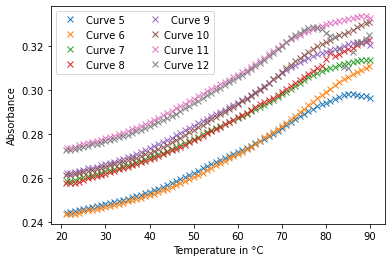

In [7]:
#Filter 'meta_overview' by input values, you will only get wherel inputs are true
filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-11-17_RNA_melting_MgCl2_NaCl.csv'],
                                        'Wavelength (nm)': [260], 'Concentration': [1, 5]})
#Group them by some input values and run a loop, you might want to sort them by using the 'sort_values'-function -> pandas docu
grouped = filtered_meta_df.groupby(['file_name', 'Measurement']) # filenam und measurement definieren immer genau eine konkrete Kurve --> perfekte zuordnung

#Create Plot
fig, ax = plt.subplots(1,1)
legend_width = 65 # breite legende --> zusammenhang mit rechts aligned funktion oben

#Plot data
for index, group in grouped:
    file_name = index[0]
    mi = index[1]
    df = data_obj.data[file_name][f'Measurement_{mi}']['data']
    ax.plot(df['Temperature (°C)'], df['Absorbance'], 'x', label = f'Curve {mi}') # mi in legende entspricht den 'Measurement' in filtered_meta_df

ax.set_ylabel('Absorbance')
ax.set_xlabel('Temperature in °C')
first_legend = ax.legend(ncol = 2)

#Right align legend
legend_text_right_align(first_legend, legend_width)

## Normalization and clipping of melting curves
For visualisation and comparisment of different environments, it is advisible to normalize your meltig curves. If you encountered some measurement failure and you want to extract just some parts of your melting curve, you can use the ''-function (TO DO for 'single use'). You may also want to use a filter function before analysis (Fourier) (TO DO).

#### 1. Normalize values to points





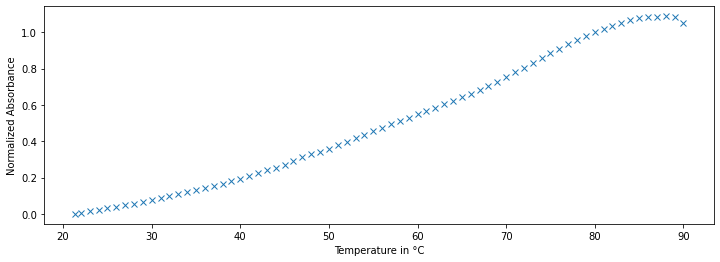

In [8]:
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 1

#Input T/x-values
T_norm_min = 21
T_norm_max = 80

#Single curve
example_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
norm_T_curve = MeltingCurveAnalysis.normalize_data(example_curve, normalize_to=(T_norm_min, T_norm_max))

#Create Plot
fig, ax = plt.subplots(1,1, sharex = True)
fig.set_size_inches(12,4)
ax.plot(example_curve['Temperature (°C)'], example_curve['Normalized Absorbance'], 'x', label = f'Curve {mi}')

ax.set_ylabel('Normalized Absorbance')
ax.set_xlabel('Temperature in °C')
plt.show()

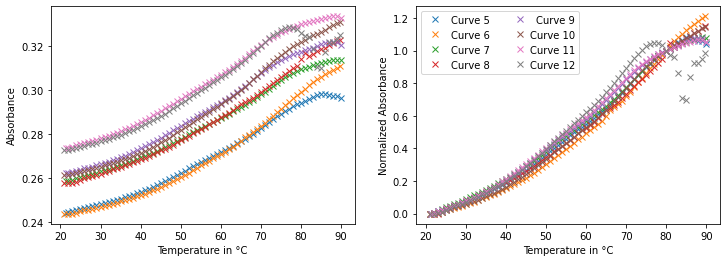

In [9]:
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 1

#Input T/x-values
T_norm_min = 21
T_norm_max = 80

#For multiple curves use for loop like before
filtered_meta_df = data_obj.apply_filters({'file_name': ['2023-11-17_RNA_melting_MgCl2_NaCl.csv'],
                                        'Wavelength (nm)': [260], 'Concentration': [1, 5]})
grouped = filtered_meta_df.groupby(['file_name', 'Measurement'])
for index, group in grouped:
    file_name = index[0]
    mi = index[1]
    
    temp_curve = data_obj.data[file_name][f'Measurement_{mi}']['data']
    norm_T_curve = MeltingCurveAnalysis.normalize_data(temp_curve, normalize_to=(T_norm_min, T_norm_max))

    
#Create Plot
fig, ax = plt.subplots(1,2, sharex = True)
fig.set_size_inches(12,4)

df = data_obj.data[file_name][f'Measurement_{mi}']['data']

for index, group in grouped:
    filename = index[0]
    mi = index[1]
    df = data_obj.data[file_name][f'Measurement_{mi}']['data']
    ax[0].plot(df['Temperature (°C)'], df['Absorbance'], 'x', label = f'Curve {mi}')
    ax[1].plot(df['Temperature (°C)'], df['Normalized Absorbance'], 'x', label = f'Curve {mi}')

ax[0].set_ylabel('Absorbance')
ax[0].set_xlabel('Temperature in °C')

ax[1].set_ylabel('Normalized Absorbance')
ax[1].set_xlabel('Temperature in °C')

first_legend = ax[1].legend(ncol = 2)
#Right align legend
legend_text_right_align(first_legend, legend_width)

#### 2. Normalize values to baselines - folded fraction
The result of this process is called 'folded fraction'. It assumes that there is a 100 % folded state (lower baselin at lower temepratures) and a 0 % folded/unfolded state (upper baseline at higher temepratures). You need to calculate both baselines by linear regression. The results may also be used inside the 'direct-curve-fit'-function as paramter input values.

#### 3. Crop curves
To remove datapoints, use the 'filter_by_values'-function. Every fit-function  also receives a filter array as an optional input paramter.

Text(0.5, 1.0, 'Multiple filter areas')

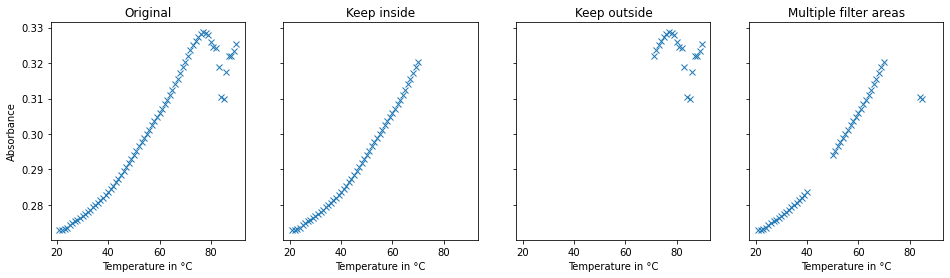

In [10]:
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 12

#-----------------------
#x ist festgelegt als Temperatur, y ist festgelegt als absorbance
#filter_bounds: dict = {'column_x': 'Temperature (°C)', 'column_y': 'Absorbance', 'x_min': -np.inf, 'y_min':- np.inf, 'x_max': np.inf, 'y_max': np.inf, 'keep_inside': True}
#-----------------------
filter_bounds_inside = {'x_max': 70}
filter_bounds_outside = {'x_max': 70, 'keep_inside': False} # keep_inside = True alls was innerhalb der angegebenen Grenzen liegt wird behalten, alles ausserhalb wird weggeschnitten, das ist default einstellung
filter_bounds_multi = [{'x_max': 40}, {'x_min': 50, 'x_max': 70}, {'x_min':80, 'y_max': 0.315, 'keep_inside': True}]

#Calculation
df = data_obj.data[file_name][f'Measurement_{mi}']['data']
filtered_inside = MeltingCurveAnalysis.filter_by_values(df, filter_bounds_inside)
filtered_outside = MeltingCurveAnalysis.filter_by_values(df, filter_bounds_outside)

#Multiple filters at once: watch out for intersecting filter bounds!
filtered_multi = MeltingCurveAnalysis.filter_multiple_times(df, filter_bounds_multi)


#Create Plot
fig, ax = plt.subplots(1,4, sharex = True, sharey = True)
fig.set_size_inches(16,4)

ax[0].plot(df['Temperature (°C)'], df['Absorbance'], 'x')
ax[1].plot(filtered_inside['Temperature (°C)'], filtered_inside['Absorbance'], 'x')
ax[2].plot(filtered_outside['Temperature (°C)'], filtered_outside['Absorbance'], 'x')
ax[3].plot(filtered_multi['Temperature (°C)'], filtered_multi['Absorbance'], 'x')

ax[0].set_ylabel('Absorbance')
ax[0].set_xlabel('Temperature in °C')

ax[1].set_xlabel('Temperature in °C')

ax[2].set_xlabel('Temperature in °C')
ax[3].set_xlabel('Temperature in °C')

ax[0].set_title('Original')
ax[1].set_title('Keep inside')
ax[2].set_title('Keep outside')
ax[3].set_title('Multiple filter areas')


## Fit
#### Derivate and Fit

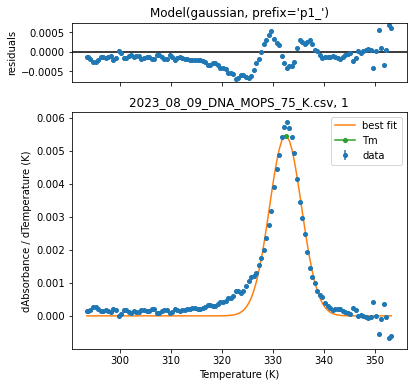

In [11]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023_08_09_DNA_MOPS_75_K.csv'
#Measurement index
mi = 1

data_obj.derivative_fit(file_name, mi)

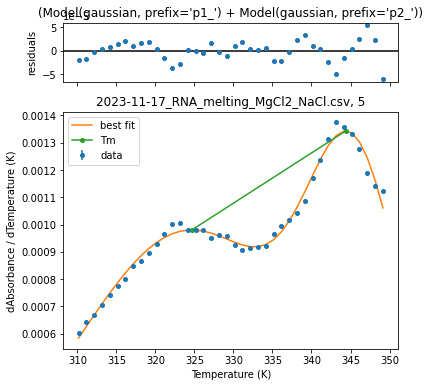

In [12]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

data_obj.derivative_fit(file_name, mi, filter_bounds = [{'column_x': 'Temperature (K)', 'x_min': 310, 'x_max' : 350}], num_peaks =  2)

#### Baselines

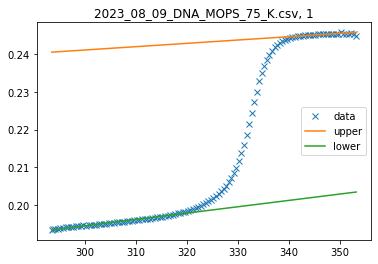

In [13]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023_08_09_DNA_MOPS_75_K.csv'
#Measurement index
mi = 1

data_obj.linear_baseline_fit(file_name, mi)



Curve Index 5 using upper tangent


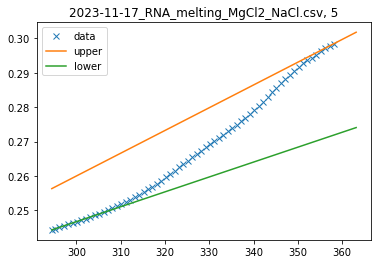

In [14]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

data_obj.linear_baseline_fit(file_name, mi, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}])

## Direct Melting

{'Tm_C': 332.4137019287617,
 'DTm': 0.049045514996927546,
 'DH_J/mol': -426801.5318209315,
 'DDH': 7103.65174610184,
 'm1': 0.00020165398563415347,
 'Dm1': 6.308184265929816e-06,
 'n1': 0.1339311625468758,
 'Dn1': 0.0019470504054031998,
 'm2': -5.068695033495902e-05,
 'Dm2': 2.2703903795176502e-05,
 'n2': 0.2630376186745849,
 'Dn2': 0.007877521344144161,
 'DS_J/mol/K': -1283.9468690505353,
 'DDS': 21.559350712501516}

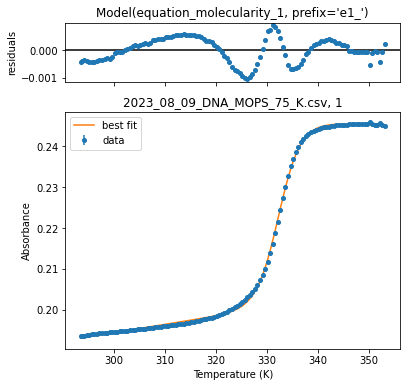

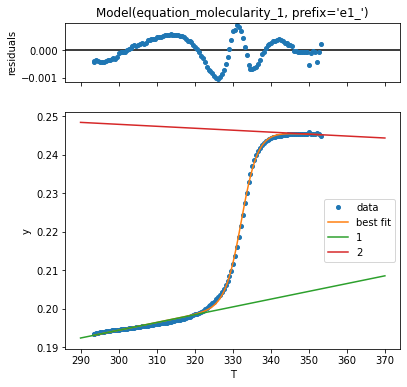

In [15]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023_08_09_DNA_MOPS_75_K.csv'
#Measurement index
mi = 1

model1 = MeltingCurveAnalysis.create_model_e1()


data_obj.direct_melt_fit(file_name, mi, model1)
data_obj.get_direct_melt_result(file_name, mi)

Curve Index 5 using upper tangent


(0.24, 0.272)

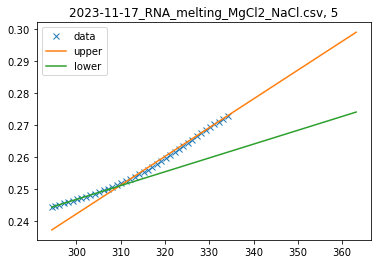

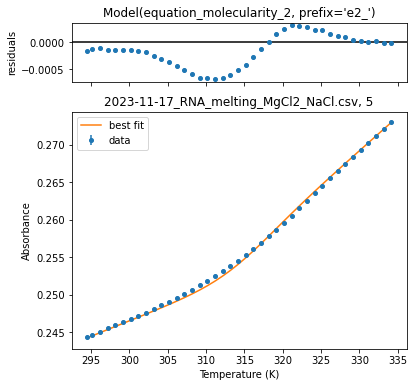

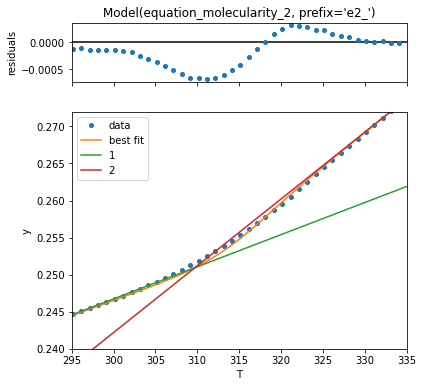

In [16]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e2()

data_obj.linear_baseline_fit(file_name, mi, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 335}])
data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 335}], plot = True, p0=data_obj._baseline_pars_melt_converter(filename=file_name, measurement_number=mi, molecularity = 2))
data_obj.get_direct_melt_result(file_name, mi)
plt.xlim(295, 335)
plt.ylim(.24, .272)

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


{'Tm_K_1': 340.27122485357137,
 'DTm_1': 0.7163888123741411,
 'DH_J/mol_1': -333004.2124689586,
 'DDH_1': 20781.23827735334,
 'DS_J/mol/K_1': -978.6434706968242,
 'Tm_K_2': 328.11972809088263,
 'DTm_2': 1.5571748469810598,
 'DH_J/mol_2': -124643.935554522,
 'DDH_2': 3479.5658413515293,
 'DS_J/mol/K_2': -379.87333550391736,
 'm1': -0.00020058030082735042,
 'Dm1': 0.00010872408668495782,
 'n1': 0.19417163547428787,
 'Dn1': 0.036776804935897627,
 'm2': 0.0005643688500173625,
 'Dm2': 0.00010246231116756632,
 'n2': -0.057086391450431324,
 'Dn2': 0.03493983410145815,
 'm3': 0.0001274144983593027,
 'Dm3': 0.0001209953974330729,
 'n3': 0.1081885430998143,
 'Dn3': 0.041556641979625844}

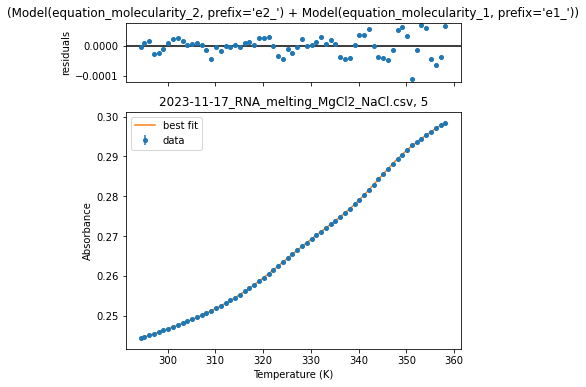

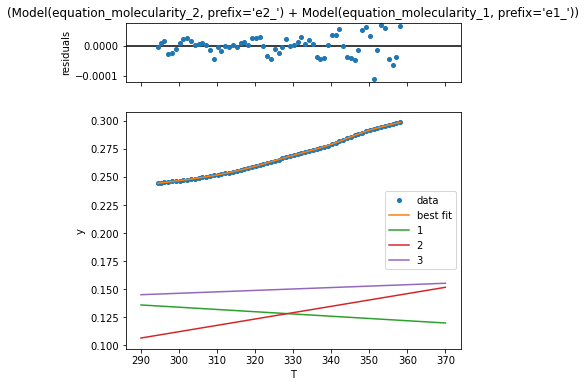

In [17]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e2_e1()

data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}], plot = True)
data_obj.get_direct_melt_result(file_name, mi)

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


{'model': "(Model(equation_molecularity_2, prefix='e2_') + Model(equation_molecularity_2, prefix='e1_'))",
 'method': 'leastsq',
 'ndata': 65,
 'nvarys': 10,
 'nfree': 55,
 'chisqr': 1.717558407094516e-07,
 'redchi': 3.122833467444575e-09,
 'aic': -1263.8526460029325,
 'bic': -1242.108773303976,
 'rsquared': 0.9999908686382953,
 'nfev': 22000,
 'max_nfev': 22000,
 'aborted': True,
 'errorbars': False,
 'success': False,
 'message': 'Tolerance seems to be too small. Could not estimate error-bars.',
 'lmdif_message': 'Fit aborted.',
 'ier': -1,
 'nan_policy': 'raise',
 'scale_covar': True,
 'calc_covar': True,
 'ci_out': None,
 'col_deriv': False,
 'flatchain': None,
 'call_kws': {'Dfun': None,
  'full_output': 1,
  'col_deriv': 0,
  'ftol': 1.5e-08,
  'xtol': 1.5e-08,
  'gtol': 0.0,
  'maxfev': 44000,
  'epsfcn': 1e-10,
  'factor': 100,
  'diag': None},
 'var_names': ['e2_DH',
  'e2_Tm',
  'e2_m1',
  'e2_n1',
  'e2_m2',
  'e2_n2',
  'e1_DH',
  'e1_Tm',
  'e1_m2',
  'e1_n2'],
 'user_opti

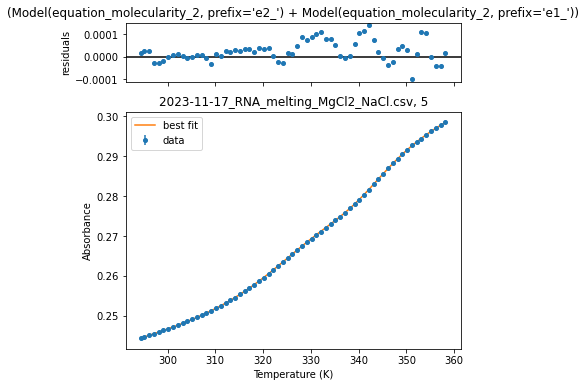

In [18]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e2_e2()

test = data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}], plot = True)
test['Fit'].summary()

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


{'model': "(Model(equation_molecularity_1, prefix='e2_') + Model(equation_molecularity_1, prefix='e1_'))",
 'method': 'leastsq',
 'ndata': 65,
 'nvarys': 10,
 'nfree': 55,
 'chisqr': 7.117475895461837e-08,
 'redchi': 1.2940865264476068e-09,
 'aic': -1321.113465922208,
 'bic': -1299.3695932232515,
 'rsquared': 0.9999962160095076,
 'nfev': 2339,
 'max_nfev': 22000,
 'aborted': False,
 'errorbars': True,
 'success': True,
 'message': 'Fit succeeded.',
 'lmdif_message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ier': 1,
 'nan_policy': 'raise',
 'scale_covar': True,
 'calc_covar': True,
 'ci_out': None,
 'col_deriv': False,
 'flatchain': None,
 'call_kws': {'Dfun': None,
  'full_output': 1,
  'col_deriv': 0,
  'ftol': 1.5e-08,
  'xtol': 1.5e-08,
  'gtol': 0.0,
  'maxfev': 44000,
  'epsfcn': 1e-10,
  'factor': 100,
  'diag': None},
 'var_names': ['e2_DH',
  'e2_Tm',
  'e2_m1',
  'e2_n1',
  'e2_m2',
  'e2_n2',
  'e1_DH',
  'e1_Tm',
  'e1_

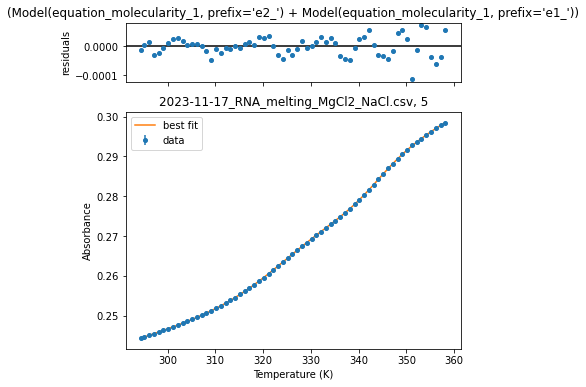

In [19]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e1_e1()

test = data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}], plot = True)
test['Fit'].summary()

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


{'Tm_K_1': 295.0253740428335,
 'DTm_1': None,
 'DH_J/mol_1': -22862.831233893434,
 'DDH_1': None,
 'DS_J/mol/K_1': -77.49445724141027,
 'Tm_K_2': 379.26752977356824,
 'DTm_2': None,
 'DH_J/mol_2': -0.005680513276858257,
 'DDH_2': None,
 'DS_J/mol/K_2': -1.4977589250125521e-05,
 'm1': 0.0004330410551735688,
 'Dm1': None,
 'n1': 0.11682273483912317,
 'Dn1': None,
 'm2': 0.001095491330326879,
 'Dm2': None,
 'n2': -0.3205599584849685,
 'Dn2': None,
 'm3': 0.0009006694041219456,
 'Dm3': None,
 'n3': -0.02801069253673611,
 'Dn3': None}

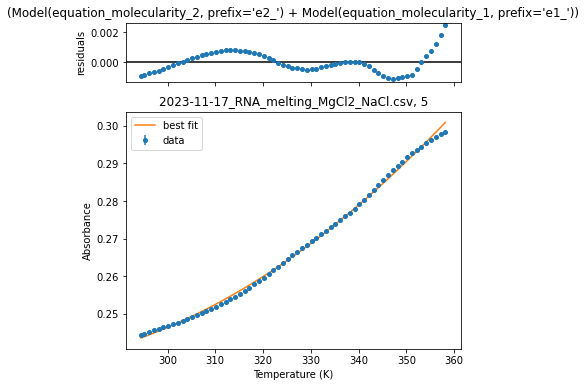

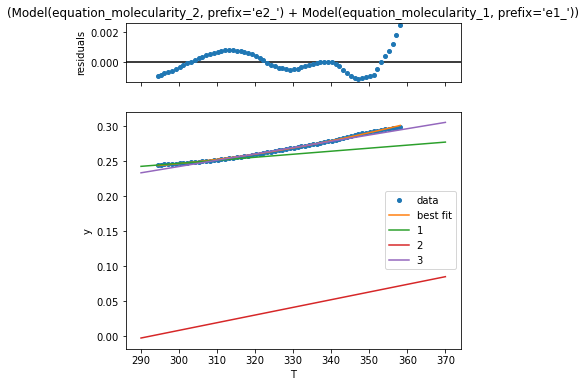

In [20]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e2_e1()

test = data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}], p0=data_obj.baseline_melt_converter_e2_e1(filename=file_name, measurement_number=mi), plot = True)


test['Fit'].summary()
data_obj.get_direct_melt_result(file_name, mi)

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


{'model': "(Model(equation_molecularity_2, prefix='e2_') + Model(equation_molecularity_1, prefix='e1_'))",
 'method': 'leastsq',
 'ndata': 65,
 'nvarys': 10,
 'nfree': 55,
 'chisqr': 1.0622507987603166e-07,
 'redchi': 1.931365088655121e-09,
 'aic': -1295.086036477857,
 'bic': -1273.3421637789006,
 'rsquared': 0.9999943525668621,
 'nfev': 790,
 'max_nfev': 22000,
 'aborted': False,
 'errorbars': False,
 'success': True,
 'message': 'Fit succeeded. Could not estimate error-bars.',
 'lmdif_message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ier': 1,
 'nan_policy': 'raise',
 'scale_covar': True,
 'calc_covar': True,
 'ci_out': None,
 'col_deriv': False,
 'flatchain': None,
 'call_kws': {'Dfun': None,
  'full_output': 1,
  'col_deriv': 0,
  'ftol': 1.5e-08,
  'xtol': 1.5e-08,
  'gtol': 0.0,
  'maxfev': 44000,
  'epsfcn': 1e-10,
  'factor': 100,
  'diag': None},
 'var_names': ['e2_DH',
  'e2_Tm',
  'e2_m1',
  'e2_n1',
  'e2_m2',
  'e2_n2

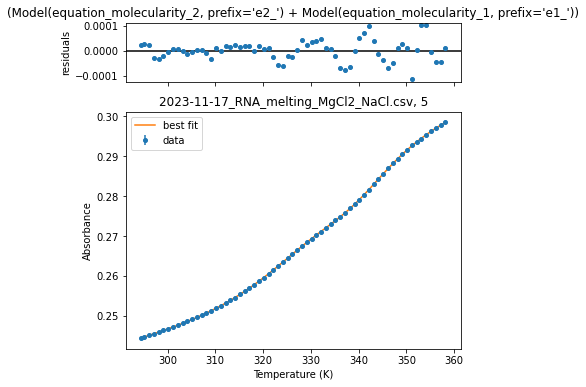

In [21]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

model1 = MeltingCurveAnalysis.create_model_e2_e1()

p0 = lmfit.Parameters()
p0.add('e2_Tm', value=325, max = 330, vary=True)
p0.add('e1_Tm', value=345, min = 340, vary=True)

temp = data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_max' : 359}], p0=p0, plot = True)

temp['Fit'].summary()

In [22]:
file_name = '2023-11-17_RNA_melting_MgCl2_NaCl.csv'
#Measurement index
mi = 5

example_curve2 = data_obj.data[file_name][f'Measurement_{mi}']['data']
example_curve2

,Temperature (°C),Absorbance,Measurement,Meta,Date,Cell_Number,Normalized Absorbance,Temperature (K),dAbsorbance / dTemperature (K)
349,21.299999,0.244401,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,0.000000,294.449999,0.000377
348,22.000000,0.244665,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,0.005275,295.150000,0.000384
347,23.000000,0.245060,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,0.013159,296.150000,0.000423
346,24.000000,0.245511,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,0.022178,297.150000,0.000430
345,25.000000,0.245921,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,0.030365,298.150000,0.000407
...,...,...,...,...,...,...,...,...,...
284,86.000000,0.298542,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,1.082113,359.150000,-0.000400
283,87.000000,0.297686,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,1.064999,360.150000,-0.000635
282,88.000000,0.297272,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,1.056740,361.150000,-0.000194
281,89.000000,0.297299,5,5 mM MgCl2_260.00nm_90.0-21.0C,2023-11-17 09:46:11 (+01:00),Cell 5,1.057263,362.150000,-0.000324


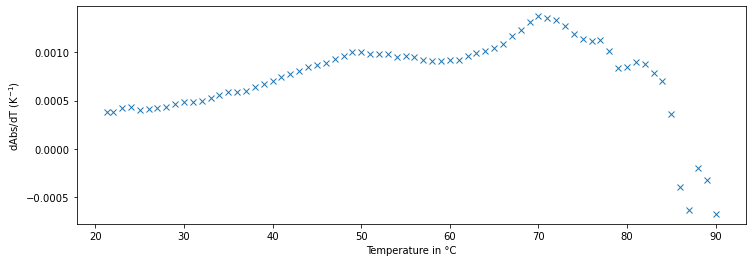

In [23]:
#Create Plot of first derivative
fig, ax = plt.subplots(1,1, sharex = True)
fig.set_size_inches(12,4)
ax.plot(example_curve2['Temperature (°C)'], example_curve2['dAbsorbance / dTemperature (K)'], 'x', label = f'Curve {mi}')

ax.set_ylabel('dAbs/dT (K$^{-1}$)')
ax.set_xlabel('Temperature in °C')
plt.show()